<a href="https://colab.research.google.com/github/StefanTesmanovic/LSImprovement/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prilikom upotrebe softvera obavezno je citiranje radova navedenih uz njega i stranice ReLDI repozitorijuma

In [80]:
!pip install classla
import classla

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re


In [82]:
def get_sentences_from_file(filename):
    sentences = []
    with open(filename, 'r') as file:
        text = file.read()
        pattern = r'\.{3}\n|\.{3}|\.\n|\. |[!] |[?] |[!]+\n|[?]+\n'
        sentences = re.split(pattern, text)
        sentences = [sentence.replace("\n", " ") for sentence in sentences]
        print(sentences)
        print(type(sentences))
    return sentences


In [83]:
def remove_zero_columns(X):
    # Find indices of columns with all zeros
    non_zero_columns = np.any(X != 0, axis=0)

    # Create a new matrix without columns of all zeros
    return X[:, non_zero_columns]


In [84]:
vectorizer = TfidfVectorizer()
file_name = "tekst.txt"
#X = vectorizer.fit_transform(corpus)
X = vectorizer.fit_transform(get_sentences_from_file(file_name))
X = X.toarray()
X = np.transpose(X)
X = remove_zero_columns(X)
print(X)
a = list(vectorizer.get_feature_names_out())
print(a)

['Ima ih priličan broj u svim velikim nacijama, a regrutuju se između najdarovitijih i najinteligentnijih, doduše, uvek sa nekom manje-više izopačenom naklonošću u pravcu intelekta, mašte ili morala, ponajčešće i zdravlja', 'Nije dobro prevedena kod nas ona poznata francuska koja takve pesnike naziva "prokletim pesnicima"', 'Ako već ne možemo bez te metafizičke kategorizacije, onda bi trebalo reći "ukleti pesnici"', 'Drugo je ljudsko proklinjanje, a drugo rodbinska ili sudbinska ukletost', 'Nije reč o tome da su ljudi, recimo, za Dostojevskim ili Bodlerom ili Poom zavitlali kamen osude i gonjenja; ili izmolili u Boga ili u đavola neku kaznu nad krivcima', 'Nego je reč o tome da ti pesnici imaju u biću svom, u talentu svom, u vokaciji svojoj imaju moć izuzetno velikog prostiranja u svim pravcima iskustva i slutnji, imaju intelektualnih radoznalosti koje premašaju oblast petorih čula čovekovih', 'Slutnje njihove, svesne ili nesvesne, osobita znanja, to je rabota nenormalna', 'Nemački pes

In [85]:
U, S, Vt = np.linalg.svd(X)
print(U.shape,"\n")
print(S,"\n")
print(Vt.shape)

(6071, 6071) 

[3.60234761e+00 2.45721769e+00 2.20691259e+00 2.05323367e+00
 1.98635434e+00 1.90264899e+00 1.86516573e+00 1.82214239e+00
 1.80543270e+00 1.75377839e+00 1.70784736e+00 1.70465340e+00
 1.68864761e+00 1.66846735e+00 1.65864420e+00 1.65035108e+00
 1.60363289e+00 1.59998958e+00 1.58659267e+00 1.57064806e+00
 1.55808880e+00 1.55115802e+00 1.54303137e+00 1.52021686e+00
 1.50338975e+00 1.49453087e+00 1.47932179e+00 1.46431847e+00
 1.45829061e+00 1.45430163e+00 1.45146527e+00 1.44610184e+00
 1.43693207e+00 1.43089775e+00 1.42269261e+00 1.41660140e+00
 1.41421356e+00 1.41129371e+00 1.40806840e+00 1.39875794e+00
 1.39715016e+00 1.39463852e+00 1.39044792e+00 1.38549254e+00
 1.38184141e+00 1.37268401e+00 1.37055048e+00 1.36697346e+00
 1.36059216e+00 1.35568030e+00 1.35456462e+00 1.34711754e+00
 1.34349395e+00 1.33515490e+00 1.33299573e+00 1.32896688e+00
 1.32614051e+00 1.32279683e+00 1.31825692e+00 1.31335265e+00
 1.31097453e+00 1.30836457e+00 1.30786783e+00 1.30285909e+00
 1.298847

In [86]:
def reduce(U, S, Vt, l):
    sum = np.sum(S)
    for i in range(int(len(S)/2), len(S)):
      if(np.sum(S[:i])/sum >= l):#ulazi ako prvih i vrednosti zadovoljava nejdnakost
        print(i)
        return (np.delete(U,np.s_[i:],1), S[:i], np.delete(Vt, np.s_[i:], 0))
        break



In [87]:
def WW(U, S):
  return (U * S**2) @ np.transpose(U)

In [88]:
def SS(Vt, S):
    return (np.transpose(Vt) * S**2) @ Vt

In [89]:
def depth(ss):
    pass

In [90]:
def LSI(U, S, Vt):
    (U, S, Vt) = reduce(U, S, Vt, 0.975)
    ww = WW(U, S)
    ss = SS(Vt, S)


726


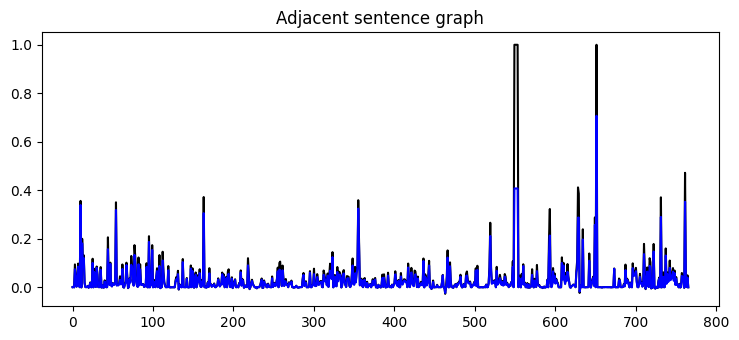

In [91]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

(U, S, Vt) = reduce(U, S, Vt, 0.975)
ss = SS(Vt, S)
intensities = np.linalg.norm(ss, axis=0)
ss_norm = ss/intensities
adj_sim = np.diagonal(ss, offset=1)
adj_sim_norm = np.diagonal(ss_norm, offset=1)
x = list(range(0, len(adj_sim)))


plt.title("Adjacent sentence graph")
plt.plot(x, adj_sim, color="black")
plt.plot(x, adj_sim_norm, color="blue")

plt.show()

[2, 9, 11, 17, 20, 23, 26, 36, 39, 42, 64, 69, 94, 96, 100, 103, 106, 109, 111, 116, 120, 122, 125, 127, 132, 135, 140, 144, 146, 148, 151, 154, 164, 166, 178, 189, 192, 199, 203, 206, 213, 220, 227, 229, 232, 236, 242, 247, 256, 268, 275, 281, 283, 291, 293, 296, 311, 324, 334, 361, 365, 367, 371, 377, 379, 383, 389, 394, 396, 398, 407, 416, 430, 437, 444, 446, 449, 452, 454, 458, 461, 463, 467, 471, 473, 477, 484, 495, 504, 506, 509, 511, 513, 515, 526, 542, 548, 554, 557, 564, 566, 568, 573, 584, 587, 591, 604, 607, 619, 625, 630, 633, 635, 637, 640, 644, 650, 653, 658, 661, 665, 667, 669, 675, 678, 682, 692, 695, 703, 712, 719, 721, 724, 727, 730, 732, 735, 753, 755, 760]
[0.03780720615397092, 0.17278746902595224, 0.2599565245057239, 0.0005631676618985496, 0.0030611497714574777, 0.00884107944090976, 0.08142489092509803, 0.03928844048668217, 0.010994473053649456, 0.0009369025833211459, 0.00476353158392325, 0.019065490914484517, 0.09329050873695699, 0.09760176767800019, 0.08806336568

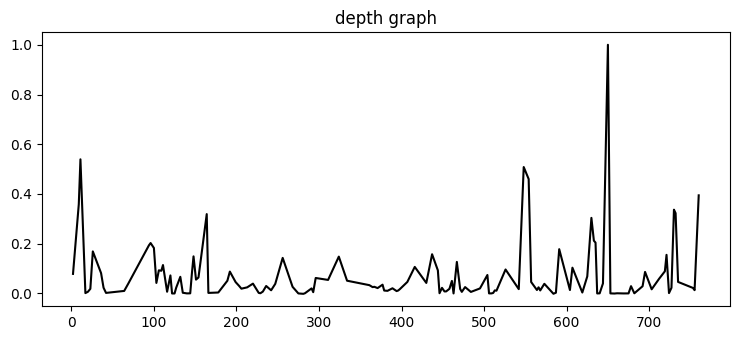

In [102]:
depth = []
x = []
for i in range(1, len(adj_sim) - 1):
    if adj_sim_norm[i] < 0.0001 and adj_sim_norm[i - 1] > adj_sim_norm[i] and adj_sim_norm[i] < adj_sim_norm[i + 1]:
        x.append(i)
        depth.append((adj_sim_norm[i-1]+adj_sim_norm[i+1])/(1-adj_sim_norm[i]))
print(x)
print(depth)
depth = depth/max(depth)
plt.title("depth graph")
plt.plot(x, depth, color="black")
plt.show()


In [101]:
par_split = []
for i in range(len(depth)):
    if(depth[i] >= 0.4):
      par_split.append(x[i])
print(par_split)

[11, 548, 554, 650]


In [94]:
from classla import Pipeline
classla.download('sr')
#classla.download('sr', type='nonstandard')
nlp = Pipeline(lang='sr', processors='tokenize,pos,lemma')

sentence = "Ovo je primer za lematizaciju."
doc = nlp(' '.join(get_sentences_from_file("tekst.txt")))
#doc = nlp(sentence)
print(doc)

INFO:classla:Downloading these customized packages for language: sr (Serbian)...
| Processor | Package  |
------------------------
| tokenize  | standard |
| pos       | standard |
| lemma     | standard |
| depparse  | standard |
| ner       | standard |
| pretrain  | standard |

INFO:classla:File exists: /root/classla_resources/sr/pos/standard.pt.
INFO:classla:File exists: /root/classla_resources/sr/lemma/standard.pt.
INFO:classla:File exists: /root/classla_resources/sr/depparse/standard.pt.
INFO:classla:File exists: /root/classla_resources/sr/ner/standard.pt.
INFO:classla:File exists: /root/classla_resources/sr/pretrain/standard.pt.
INFO:classla:Finished downloading models and saved to /root/classla_resources.
INFO:classla:Loading these models for language: sr (Serbian):
| Processor | Package  |
------------------------
| tokenize  | standard |
| pos       | standard |
| lemma     | standard |

INFO:classla:Use device: cpu
INFO:classla:Loading: tokenize
INFO:classla:Loading: pos
INF

['Ima ih priličan broj u svim velikim nacijama, a regrutuju se između najdarovitijih i najinteligentnijih, doduše, uvek sa nekom manje-više izopačenom naklonošću u pravcu intelekta, mašte ili morala, ponajčešće i zdravlja', 'Nije dobro prevedena kod nas ona poznata francuska koja takve pesnike naziva "prokletim pesnicima"', 'Ako već ne možemo bez te metafizičke kategorizacije, onda bi trebalo reći "ukleti pesnici"', 'Drugo je ljudsko proklinjanje, a drugo rodbinska ili sudbinska ukletost', 'Nije reč o tome da su ljudi, recimo, za Dostojevskim ili Bodlerom ili Poom zavitlali kamen osude i gonjenja; ili izmolili u Boga ili u đavola neku kaznu nad krivcima', 'Nego je reč o tome da ti pesnici imaju u biću svom, u talentu svom, u vokaciji svojoj imaju moć izuzetno velikog prostiranja u svim pravcima iskustva i slutnji, imaju intelektualnih radoznalosti koje premašaju oblast petorih čula čovekovih', 'Slutnje njihove, svesne ili nesvesne, osobita znanja, to je rabota nenormalna', 'Nemački pes

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

